In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SequentialFeatureSelector, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
train = pd.read_excel(r"C:\Users\danie\Documents\data projects\Titanic data analysis\Train Data\train2.xlsx")
train = train.dropna()

In [20]:
train.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
6,0,1,male,54.0,0,0,51.8625,S


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [22]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [23]:
class_bins = [0, 1, 2, 3]
class_names = ["First Class", "Second Class", "Third Class"]
train["Pclass"] = pd.cut(train["Pclass"], bins = class_bins, labels = class_names) #make Pclass categorical variable
train["Sex"] = LabelEncoder().fit_transform(train["Sex"])
train = pd.get_dummies(data=train, columns = ["Embarked", "Pclass"])
train.head(6)

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_First Class,Pclass_Second Class,Pclass_Third Class
0,0,1,22.0,1,0,7.2500,False,False,True,False,False,True
1,1,0,38.0,1,0,71.2833,True,False,False,True,False,False
2,1,0,26.0,0,0,7.9250,False,False,True,False,False,True
3,1,0,35.0,1,0,53.1000,False,False,True,True,False,False
4,0,1,35.0,0,0,8.0500,False,False,True,False,False,True
6,0,1,54.0,0,0,51.8625,False,False,True,True,False,False


<Axes: >

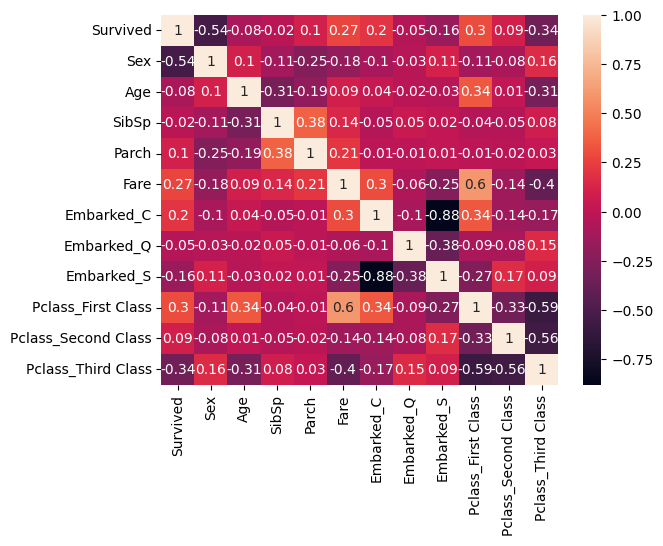

In [24]:
noscl_cormat = train.corr(numeric_only=True)
sns.heatmap(round(noscl_cormat, 2), annot = True)

In [25]:
#seperating X and Y values
X = train.drop("Survived", axis = 1)
Y = train["Survived"]

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state= 32)

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train[:4]

array([[ 0.75891328, -0.07526662, -0.56203343, -0.50610161, -0.4808238 ,
         2.08682503, -0.19364917, -1.86721356, -0.5881717 , -0.57271284,
         1.00806465],
       [ 0.75891328, -1.32603589,  0.55307672,  1.80617913,  1.47394902,
        -0.47919686, -0.19364917,  0.53555738,  1.70018381, -0.57271284,
        -0.99199987],
       [ 0.75891328,  0.82806675,  0.55307672, -0.50610161,  0.28822581,
        -0.47919686, -0.19364917,  0.53555738,  1.70018381, -0.57271284,
        -0.99199987],
       [ 0.75891328, -0.83962562,  0.55307672, -0.50610161, -0.50523575,
        -0.47919686, -0.19364917,  0.53555738, -0.5881717 , -0.57271284,
         1.00806465]])

#Random Forest Classifier

In [28]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

In [29]:
#show results of the Random Forest model
print(confusion_matrix(Y_test, rfc_pred))
print(classification_report(Y_test, rfc_pred))

[[106  23]
 [ 25  60]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       129
           1       0.72      0.71      0.71        85

    accuracy                           0.78       214
   macro avg       0.77      0.76      0.76       214
weighted avg       0.77      0.78      0.78       214



#MLPClassifier or Neural Network

In [41]:
mlpc = MLPClassifier(hidden_layer_sizes = (5, 6, 5), max_iter = 650)
mlpc.fit(X_train, Y_train)
mlpc_pred = mlpc.predict(X_test)

In [42]:
#show results of the Neural Network model
print(confusion_matrix(Y_test, mlpc_pred))
print(classification_report(Y_test, mlpc_pred))

[[112  17]
 [ 26  59]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       129
           1       0.78      0.69      0.73        85

    accuracy                           0.80       214
   macro avg       0.79      0.78      0.79       214
weighted avg       0.80      0.80      0.80       214



#Performing Feature Selection On MLPC, Starting With The 3 Most Important Variables and It Will Be Backward Feature Selection

#Neural Network did much better thna Random Forest so I will use that for my next test prediction

In [32]:
test = pd.read_csv(r"C:\Users\danie\Documents\data projects\Titanic data analysis\Test Data\test.csv")
passenger_id = test["PassengerId"]
print(test.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


In [33]:
test = test.drop(["Cabin", "Name", "Ticket", "PassengerId"], axis=1)
test = test.fillna(value={"Age": test["Age"].mean(), "Fare":test["Fare"].mean()})
class_bins = [0, 1, 2, 3]
class_names = ["First Class", "Second Class", "Third Class"]
test["Pclass"] = pd.cut(test["Pclass"], bins = class_bins, labels = class_names) #make Pclass categorical variable
test["Sex"] = LabelEncoder().fit_transform(test["Sex"])
test = pd.get_dummies(data=test, columns = ["Embarked", "Pclass"])
test.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_First Class,Pclass_Second Class,Pclass_Third Class
0,1,34.5,0,0,7.8292,False,True,False,False,False,True
1,0,47.0,1,0,7.0000,False,False,True,False,False,True
2,1,62.0,0,0,9.6875,False,True,False,False,True,False
3,1,27.0,0,0,8.6625,False,False,True,False,False,True
4,0,22.0,1,1,12.2875,False,False,True,False,False,True


In [36]:
data = {"PassengerId":passenger_id, "Survived":mlpc.predict(scaler.transform(test))}
mlpc_pred = pd.DataFrame(data)
mlpc_pred.to_csv(r"C:\Users\danie\Documents\data projects\Titanic data analysis\Prediction Results\mlpc_pred.csv", index = False)
mlpc_pred["Survived"].value_counts()

Survived
0    254
1    164
Name: count, dtype: int64

#creating an excel file with the final result

In [37]:
data["Survived"] = rfc.predict(scaler.transform(test))
rfc_pred = pd.DataFrame(data)
rfc_pred.to_csv(r"C:\Users\danie\Documents\data projects\Titanic data analysis\Prediction Results\rfc_pred.csv", index = False)
rfc_pred["Survived"].value_counts()

Survived
0    265
1    153
Name: count, dtype: int64